In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="http://arbeitgeberliste.bplaced.net/#%7B%22col_1%22%3A%7B%7D%7D"
try:
    r = requests.get(url)
    r.raise_for_status()
except requests.exceptions.HTTPError as err:
    raise SystemExit(err)
html = r.content
df_list = pd.read_html(html)
df_list

[    Bundesland              Kreis   Stadt / Gemeinde  \
 0       Hessen    Landkreis Fulda              Fulda   
 1       Hessen    Landkreis Fulda              Fulda   
 2       Hessen   Landkreis Gießen           Pohlheim   
 3       Hessen  Main-Kinzig-Kreis           Schöneck   
 4       Hessen    Lahn-Dill-Kreis            Wetzlar   
 ..         ...                ...                ...   
 799     Hessen  Main-Kinzig-Kreis       Wächtersbach   
 800     Hessen  Offenbach am Main  Offenbach am Main   
 801     Hessen    Lahn-Dill-Kreis            Wetzlar   
 802     Hessen      Wetteraukreis           Butzbach   
 803     Hessen             Kassel             Kassel   
 
                                            Unternehmen  Links Mitarbeiter  \
 0                      3D Formen- und Werkzeugbau GmbH    NaN       28 MA   
 1                             A & S - Engineering GmbH    NaN       50 MA   
 2                                    A+W Software GmbH    NaN      141 MA   
 3

In [26]:
df_list[0].columns

Index(['Bundesland', 'Kreis', 'Stadt / Gemeinde', 'Unternehmen', 'Links',
       'Mitarbeiter', '⌀ Gehalt / MA', '*', 'Gegenstand des Unternehmens',
       'Löhne und Gehälter', 'Ort (Werk)', 'Lat', 'Lon', 'Geschäfts­jahr'],
      dtype='object')

In [4]:
df = df_list[0].copy()

In [5]:
df_preprocessed = df.drop(columns=['*','Links','Gegenstand des Unternehmens','Geschäfts­jahr','Löhne und Gehälter', 'Stadt / Gemeinde'])

In [6]:
df_preprocessed = df_preprocessed.rename(columns={
    'Lat' : 'Latitude',
    'Lon' : 'Longitude',
    '⌀ Gehalt / MA' : 'Jahresgehalt (AVG)'
})

In [7]:
df_preprocessed.replace('k. A.', np.nan, inplace=True)

In [8]:
df_preprocessed['Mitarbeiter'] = df_preprocessed['Mitarbeiter'].str.replace(r' MA', '').str.replace('.', '').astype('int')

/var/folders/x8/dy2jl03j1xg8447w9rkkjvrm0000gn/T/ipykernel_30448/3611651342.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_preprocessed['Mitarbeiter'] = df_preprocessed['Mitarbeiter'].str.replace(r' MA', '').str.replace('.', '').astype('int')


In [9]:
df_preprocessed.dtypes

Bundesland             object
Kreis                  object
Unternehmen            object
Mitarbeiter             int64
Jahresgehalt (AVG)     object
Ort (Werk)             object
Latitude              float64
Longitude             float64
dtype: object

In [12]:
df_preprocessed['Jahresgehalt (AVG)'].dtype == "float64"

True

In [11]:
if df_preprocessed['Jahresgehalt (AVG)'].dtype == "object":
    df_preprocessed['Jahresgehalt (AVG)'] = df_preprocessed['Jahresgehalt (AVG)'].dropna().str.replace(r' €/MA', '').str.replace('.', '').astype('float')

/var/folders/x8/dy2jl03j1xg8447w9rkkjvrm0000gn/T/ipykernel_30448/1330207194.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_preprocessed['Jahresgehalt (AVG)'] = df_preprocessed['Jahresgehalt (AVG)'].dropna().str.replace(r' €/MA', '').str.replace('.', '').astype('float')


In [13]:
df_preprocessed.head()

,Bundesland,Kreis,Unternehmen,Mitarbeiter,Jahresgehalt (AVG),Ort (Werk),Latitude,Longitude
0,Hessen,Landkreis Fulda,3D Formen- und Werkzeugbau GmbH,28,NaN,Fulda,50.57460,9.69442
1,Hessen,Landkreis Fulda,A & S - Engineering GmbH,50,NaN,Fulda,50.52873,9.68570
2,Hessen,Landkreis Gießen,A+W Software GmbH,141,67615.0,Pohlheim,50.52808,8.75195
3,Hessen,Main-Kinzig-Kreis,A. Ebbecke Verfahrenstechnik AG,107,NaN,Schöneck,50.20074,8.85493
4,Hessen,Lahn-Dill-Kreis,A.S.S. Fertigungstechnik GmbH & Co. KG,25,NaN,Wetzlar,50.55118,8.48092


In [14]:
df_preprocessed['Jahresgehalt (AVG)']

0          NaN
1          NaN
2      67615.0
3          NaN
4          NaN
        ...   
799    45593.0
800    72362.0
801    51342.0
802    46957.0
803    52020.0
Name: Jahresgehalt (AVG), Length: 804, dtype: float64

In [64]:
df_preprocessed

,Bundesland,Kreis,Unternehmen,Mitarbeiter,Jahresgehalt (AVG),Ort (Werk),Latitude,Longitude
0,Hessen,Landkreis Fulda,3D Formen- und Werkzeugbau GmbH,28,NaN,Fulda,50.57460,9.69442
1,Hessen,Landkreis Fulda,A & S - Engineering GmbH,50,NaN,Fulda,50.52873,9.68570
2,Hessen,Landkreis Gießen,A+W Software GmbH,141,67615.0,Pohlheim,50.52808,8.75195
3,Hessen,Main-Kinzig-Kreis,A. Ebbecke Verfahrenstechnik AG,107,NaN,Schöneck,50.20074,8.85493
4,Hessen,Lahn-Dill-Kreis,A.S.S. Fertigungstechnik GmbH & Co. KG,25,NaN,Wetzlar,50.55118,8.48092
...,...,...,...,...,...,...,...,...
799,Hessen,Main-Kinzig-Kreis,sfm medical devices GmbH,239,45593.0,Wächtersbach,50.25794,9.29791
800,Hessen,Offenbach am Main,tecsis GmbH,181,72362.0,Offenbach am Main,50.08357,8.83927
801,Hessen,Lahn-Dill-Kreis,vR production (DUKTUS) gmbh (vormals: Duktus (...,238,51342.0,Wetzlar,50.56081,8.49697
802,Hessen,Wetteraukreis,voestalpine BWG GmbH (vormals: voestalpine Bah...,756,46957.0,Butzbach,50.44309,8.66642


In [65]:
df_preprocessed.describe()

,Mitarbeiter,Jahresgehalt (AVG),Latitude,Longitude
count,804.000000,630.000000,804.000000,804.000000
mean,1583.402985,51378.692063,50.392886,9.298171
std,11006.911074,16678.820700,0.456455,0.620369
min,1.000000,6822.000000,49.510270,8.073150
25%,71.750000,40344.000000,50.062963,8.769440
50%,187.000000,49876.000000,50.277610,9.175635
75%,575.000000,59795.000000,50.611760,9.718850
max,276750.000000,193861.000000,51.782540,11.039870


In [69]:
df_preprocessed.iloc[df_preprocessed['Mitarbeiter'].idxmax()]

Bundesland                              Hessen
Kreis                          Hochtaunuskreis
Unternehmen            Fresenius SE & Co. KGaA
Mitarbeiter                             276750
Jahresgehalt (AVG)                         NaN
Ort (Werk)            Bad Homburg vor der Höhe
Latitude                              50.21586
Longitude                              8.62274
Name: 232, dtype: object

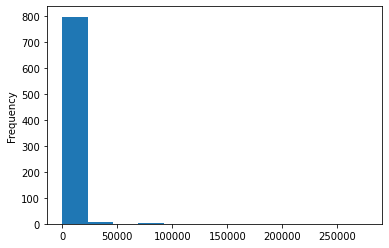

In [19]:
sns.set_style()
ax = df_preprocessed['Mitarbeiter'].plot.hist(bins=12)

In [16]:
df_preprocessed['Mitarbeiter'][df_preprocessed['Mitarbeiter']>10000]

57      35167
58      13725
74      34919
83      19270
109     28131
110     28131
116     11052
185     10457
217     10331
232    276750
243     18386
406     89373
432     78636
501     21206
553     23405
696     10092
718     11571
Name: Mitarbeiter, dtype: int64

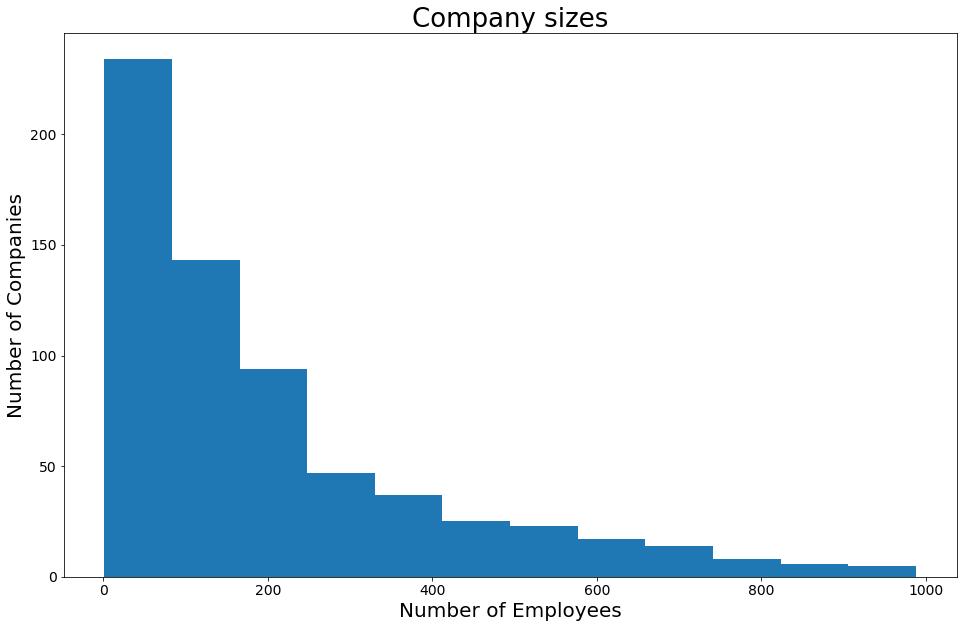

In [36]:
df_preprocessed['Mitarbeiter'][df_preprocessed['Mitarbeiter']<1000].plot.hist(bins=12, alpha=1.0, figsize=(16,10), fontsize=14)
plt.title("Company sizes", size=26)
plt.xlabel("Number of Employees", size=20)
plt.ylabel("Number of Companies", size=20)
plt.savefig("Distribution_Employees.png")

In [100]:
dict_company_size = {
    "0 - 20": np.vectorize(lambda x: 0 < x <= 20),
    "21 - 100": np.vectorize(lambda x: 20 < x <= 100),
    "101 - 300": np.vectorize(lambda x: 100 < x <= 300),
    "301 - 1000": np.vectorize(lambda x: 300 < x <= 1000),
    "1001 - 10000": np.vectorize(lambda x: 1000 < x <= 10000),
    "> 10000": np.vectorize(lambda x: x > 10000)
}

In [103]:
df_preprocessed[dict_company_size["> 10000"](df_preprocessed['Mitarbeiter'])]

,Bundesland,Kreis,Unternehmen,Mitarbeiter,Jahresgehalt (AVG),Ort (Werk),Latitude,Longitude
57,Bayern,Würzburg,BNG,35167,51750.0,Würzburg,49.81146,9.88909
58,Bayern,Landkreis Rhön-Grabfeld,BSH Hausgeräte GmbH (vormals: BSH Bosch und Si...,13725,63628.0,Bad Neustadt,50.33502,10.21917
74,Bayern,Würzburg,Bilfinger Noell GmbH,34919,49428.0,Würzburg,49.81150,9.88929
83,Bayern,Landkreis Main-Spessart,Bosch Rexroth AG,19270,NaN,Lohr a. Main,50.01416,9.59056
109,Niedersachsen,Landkreis Göttingen,Carl Zeiss AG,28131,58906.0,Göttingen,51.53694,9.91671
110,Hessen,Lahn-Dill-Kreis,Carl Zeiss AG,28131,58906.0,Wetzlar,50.56355,8.50017
116,Nordrhein-Westfalen,Kreis Paderborn,Claas Kommanditgesellschaft auf Aktien mbH,11052,50940.0,Paderborn,51.69041,8.74854
185,Hessen,Rheingau-Taunus-Kreis,ElringKlinger AG,10457,44453.0,Idstein,50.20805,8.25962
217,Hessen,Landkreis Marburg-Biedenkopf,Federal-Mogul Holding Deutschland GmbH,10331,50545.0,Stadtallendorf,50.82422,9.01358
232,Hessen,Hochtaunuskreis,Fresenius SE & Co. KGaA,276750,NaN,Bad Homburg vor der Höhe,50.21586,8.62274


In [108]:
df_preprocessed[[10 < x < 50 for x in df_preprocessed['Mitarbeiter']]]

,Bundesland,Kreis,Unternehmen,Mitarbeiter,Jahresgehalt (AVG),Ort (Werk),Latitude,Longitude
0,Hessen,Landkreis Fulda,3D Formen- und Werkzeugbau GmbH,28,NaN,Fulda,50.57460,9.69442
4,Hessen,Lahn-Dill-Kreis,A.S.S. Fertigungstechnik GmbH & Co. KG,25,NaN,Wetzlar,50.55118,8.48092
8,Hessen,Landkreis Marburg-Biedenkopf,ACS - Advanced Customer Service - Deutschland ...,27,71771.0,Gladenbach,50.74975,8.61028
10,Hessen,Hochtaunuskreis,ADDITIVE Soft- und Hardware für Technik und Wi...,44,42957.0,Friedrichsdorf,50.25979,8.65477
14,Hessen,Landkreis Hersfeld-Rotenburg,AFOTEK Anlagen für Oberflächentechnik GmbH,49,44279.0,Bad Hersfeld,50.85652,9.72554
...,...,...,...,...,...,...,...,...
781,Hessen,Main-Kinzig-Kreis,dima GmbH,11,NaN,Hanau,50.14703,8.90042
787,Hessen,Landkreis Fulda,eska Kossatz Maschinenbau GmbH,23,NaN,Eichenzell,50.48200,9.73176
788,Hessen,Landkreis Fulda,eska Schneider Lagersysteme GmbH,26,NaN,Eichenzell,50.48163,9.73168
792,Hessen,Landkreis Fulda,innovation mecom GmbH,45,NaN,Fulda,50.52727,9.68280


In [109]:
df_preprocessed['Mitarbeiter'].max()

276750

In [112]:
distance = 0.8*6371*180/np.pi*np.sqrt((50.11605*np.pi/360. - 49.72825*np.pi/360.)**2 + (8.72547*np.pi/360. - 9.96399*np.pi/360.)**2)

In [113]:
distance

3307.3486593784996

In [ ]:
lat1, long1 = df_preprocessed.iloc[438,:][['Latitude', 'Longitude']]

In [ ]:
lat2, long2 = df_preprocessed.iloc[446,:][['Latitude', 'Longitude']]

In [121]:
lat3, long3 = df_preprocessed.iloc[490,:][['Latitude', 'Longitude']]

In [141]:
locations = list(zip(df_preprocessed['Latitude'], df_preprocessed['Longitude']))
locations

[(50.5746, 9.69442),
 (50.52873, 9.6857),
 (50.52808, 8.75195),
 (50.20074, 8.85493),
 (50.55118, 8.48092),
 (50.21575, 8.61534),
 (49.91571, 9.12169),
 (50.83857, 9.99095),
 (50.74975, 8.61028),
 (50.00295, 9.23979),
 (50.25979, 8.65477),
 (50.55649, 10.3777),
 (50.55649, 10.3777),
 (50.80801, 9.92425),
 (50.85652, 9.72554),
 (50.85652, 9.72554),
 (51.50249, 9.38939),
 (51.50249, 9.38939),
 (51.50249, 9.38939),
 (50.05117, 8.92909),
 (51.78254, 8.7076),
 (50.11558, 8.96964),
 (51.37998, 9.00005),
 (50.21245, 8.57363),
 (51.31479, 9.53303),
 (49.99867, 9.225),
 (50.13112, 8.86019),
 (50.21811, 8.61428),
 (50.18662, 8.64441),
 (49.77457, 9.92604),
 (50.63738, 9.38724),
 (51.26154, 9.39489),
 (49.96869, 11.02502),
 (49.87978, 9.14578),
 (50.04565, 8.95944),
 (50.12895, 8.76745),
 (50.14126, 9.1124),
 (50.62131, 9.45695),
 (51.28465, 9.52955),
 (51.28637, 9.53228),
 (50.09561, 9.03958),
 (49.9678, 9.14275),
 (50.87018, 9.72121),
 (51.49877, 9.38258),
 (50.82249, 10.4351),
 (50.11636, 8.62

In [144]:
loc_i = (49.989221,9.572231)

In [145]:
loc_i_multiple = [loc_i for i in range(df_preprocessed.shape[0])]

In [123]:
loc1 = (lat1, long1)
loc2 = (lat2, long2)
loc3 = (lat3, long3)

In [120]:
import haversine as hs
hs.haversine(loc1, loc2)

98.58091080117065

In [124]:
hs.haversine_vector([loc1, loc1], [loc2, loc3])

array([98.5809108, 10.7124261])

In [147]:
distances = hs.haversine_vector(loc_i_multiple, locations)

In [151]:
df_preprocessed.iloc[np.argmin(distances),:]

Bundesland                             Bayern
Kreis                 Landkreis Main-Spessart
Unternehmen            Gerresheimer Lohr GmbH
Mitarbeiter                              9887
Jahresgehalt (AVG)                    35238.0
Ort (Werk)                       Lohr am Main
Latitude                             49.98447
Longitude                             9.57897
Name: 260, dtype: object

In [152]:
df_preprocessed[distances < 5]

,Bundesland,Kreis,Unternehmen,Mitarbeiter,Jahresgehalt (AVG),Ort (Werk),Latitude,Longitude
83,Bayern,Landkreis Main-Spessart,Bosch Rexroth AG,19270,NaN,Lohr a. Main,50.01416,9.59056
260,Bayern,Landkreis Main-Spessart,Gerresheimer Lohr GmbH,9887,35238.0,Lohr am Main,49.98447,9.57897
489,Bayern,Landkreis Main-Spessart,Nikolaus Sorg GmbH & Co. KG,483,52700.0,Lohr am Main,50.00397,9.58362
740,Bayern,Landkreis Main-Spessart,Walter Hunger GmbH & Co. KG - Hydraulikzylinde...,122,46922.0,Lohr,49.98008,9.58278


In [155]:
type(loc1)

tuple

In [156]:
type(locations)

list

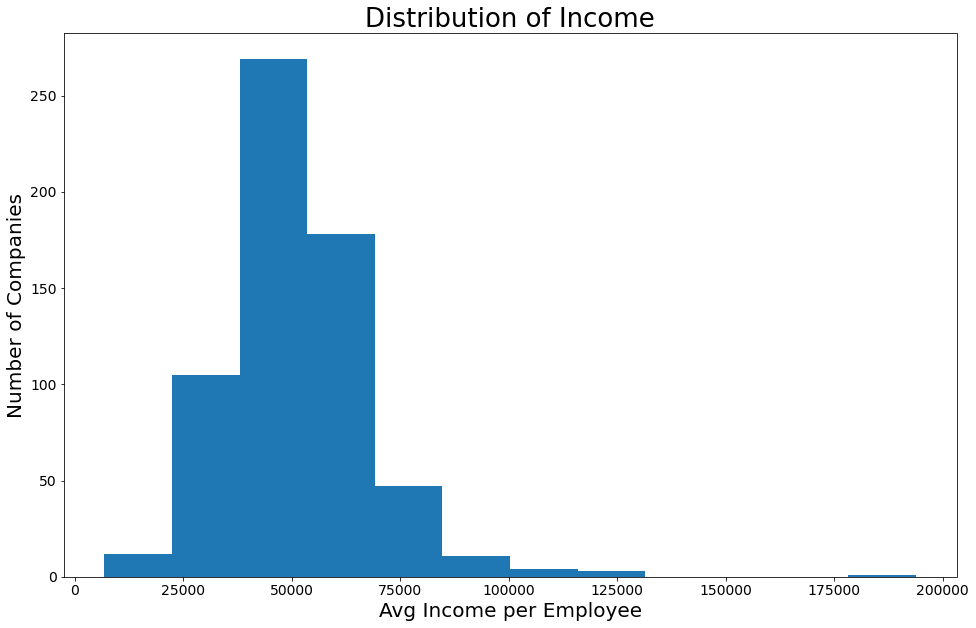

In [32]:
import seaborn as sns
sns.set_style()
df_preprocessed['Jahresgehalt (AVG)'].plot.hist(bins=12, alpha=1.0, figsize=(16,10), fontsize=14)
plt.title("Distribution of Income", size=26)
plt.xlabel("Avg Income per Employee", size=20)
plt.ylabel("Number of Companies", size=20)
plt.savefig("Distribution_Income.png")